# Proyecto Final AEM
- Sofía Maldonado 
- César

In [2]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('credit_risk_dataset.csv')
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [4]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


De nuestras 12 variables, solo 2 (`person_emp_length` y `loan_int_rate` tienen valores nulos).

array([[<Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_income'}>,
        <Axes: title={'center': 'person_emp_length'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>,
        <Axes: title={'center': 'loan_percent_income'}>],
       [<Axes: title={'center': 'cb_person_cred_hist_length'}>, <Axes: >,
        <Axes: >]], dtype=object)

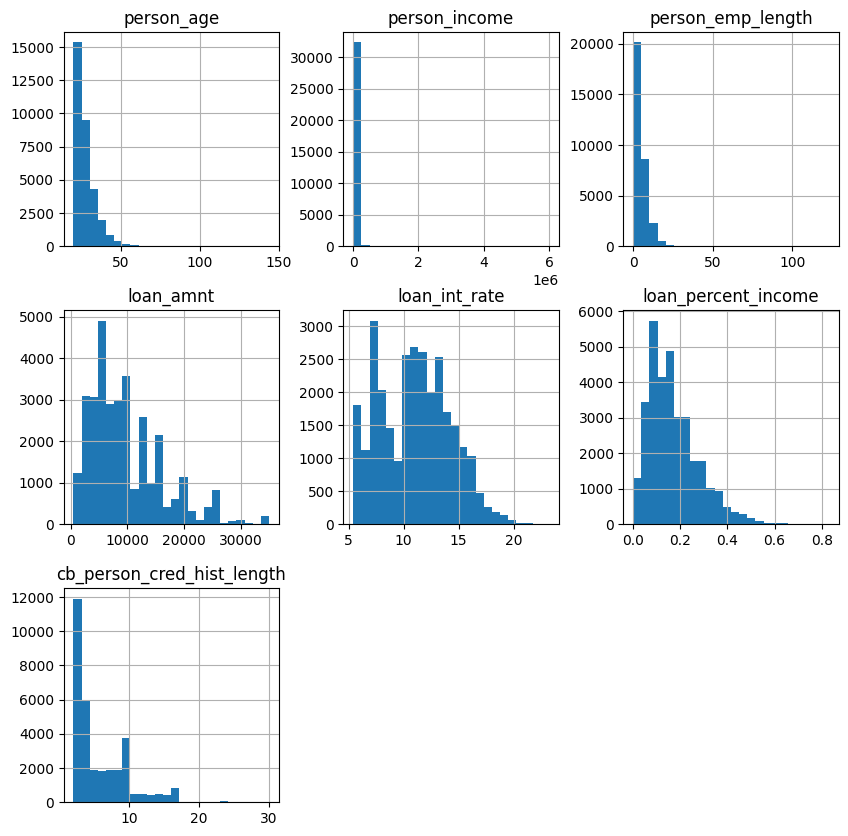

In [6]:
variables_num = ["person_age","person_income","person_emp_length","loan_amnt","loan_int_rate","loan_percent_income","cb_person_cred_hist_length"]

df[variables_num].hist(bins=24,figsize=(10,10))

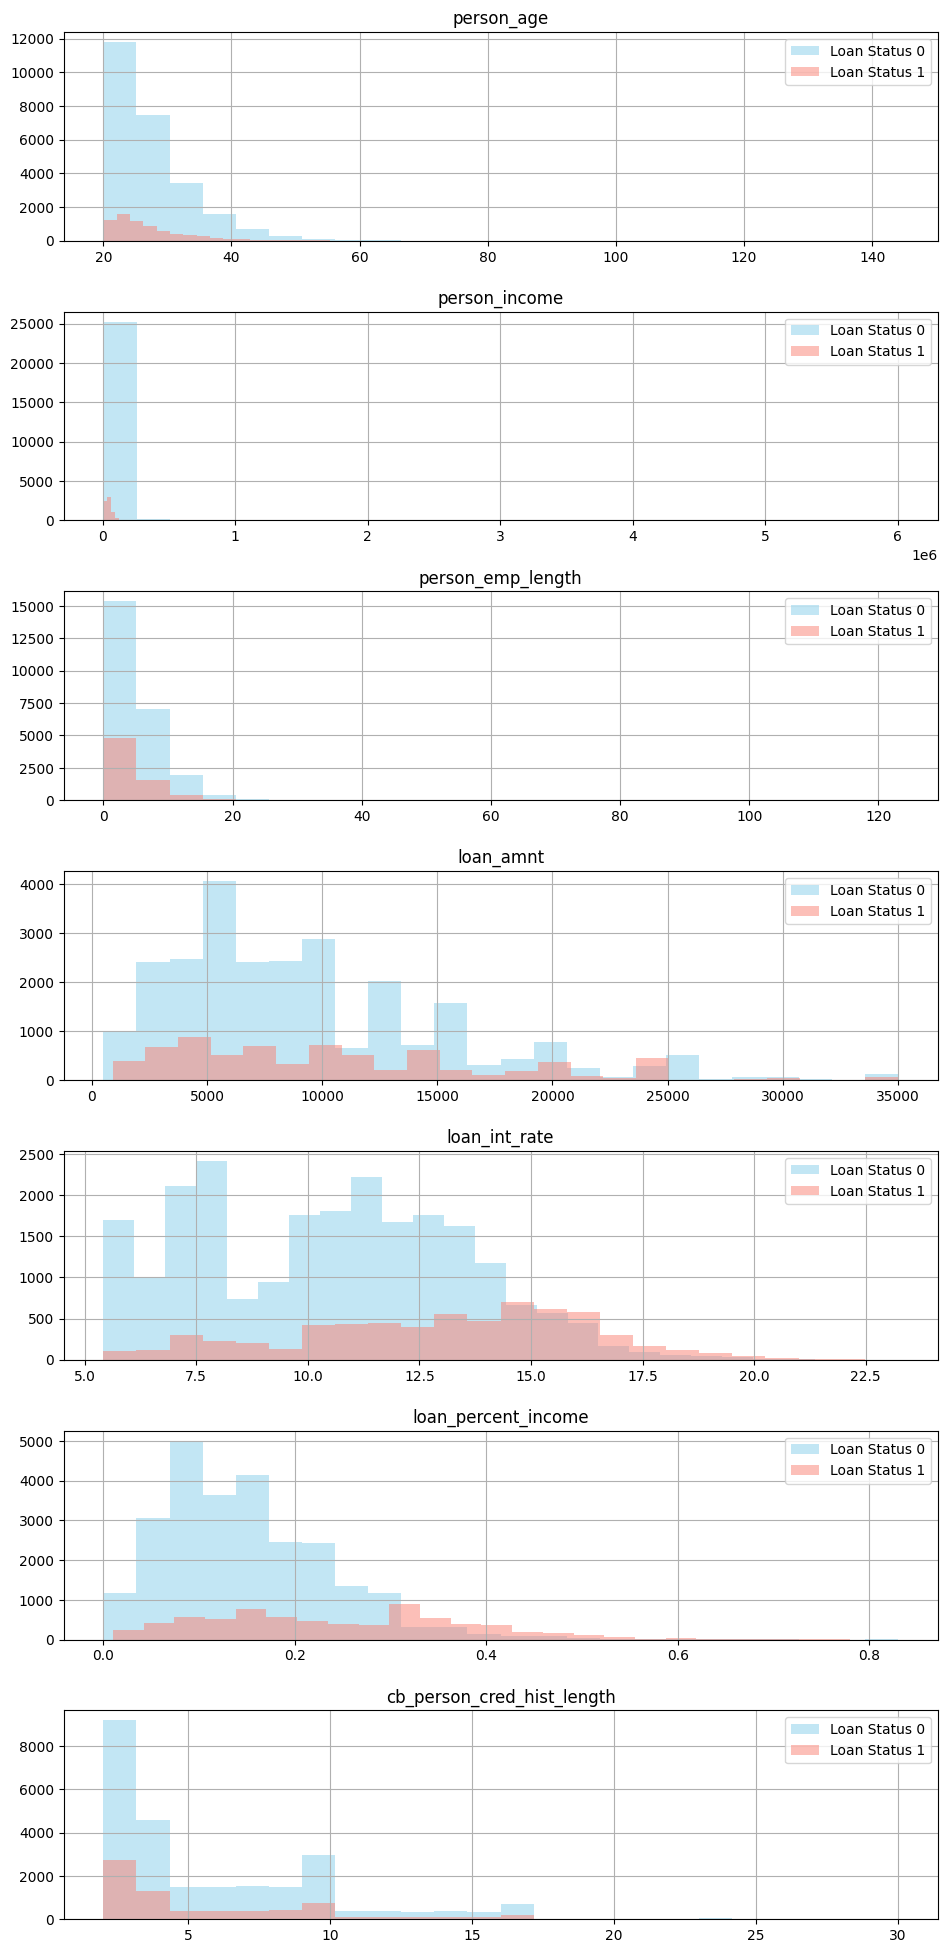

In [7]:
variables_num = ["person_age","person_income","person_emp_length","loan_amnt","loan_int_rate","loan_percent_income","cb_person_cred_hist_length"]
loan_status_values = [0, 1]  
colors = ['skyblue', 'salmon']  

fig, axes = plt.subplots(nrows=len(variables_num), ncols=1, figsize=(10, 20))
fig.tight_layout(pad=3.0)

for i, variable in enumerate(variables_num):
    ax = axes[i]
    for status, color in zip(loan_status_values, colors):
        df[df['loan_status'] == status][variable].hist(
            bins=24, alpha=0.5, color=color, ax=ax, label=f'Loan Status {status}'
        )
    ax.set_title(f'{variable}')
    ax.legend()

plt.show()


En nuestras variables categóricas, podemos apreciar mucho sesgo positivo. Esto se debe principalmente a algunos casos de outliers erróneos. 

<Axes: >

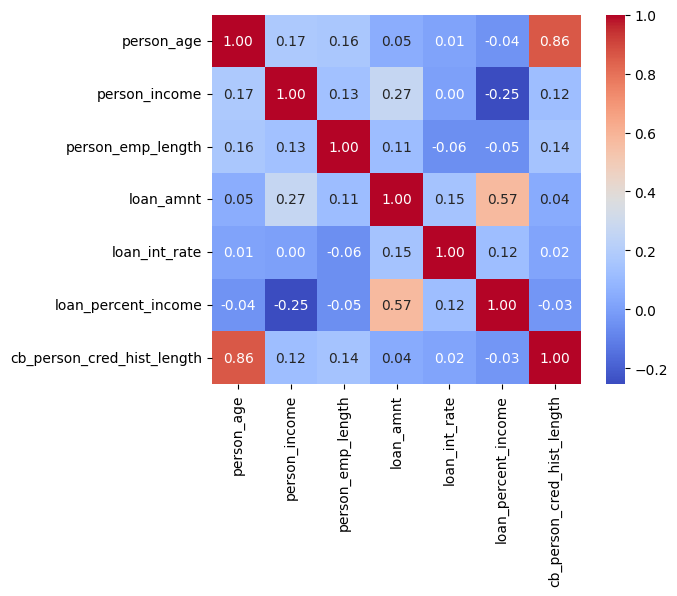

In [8]:
matriz_corr = df[variables_num].corr()
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)

En base a lo visto, podríamos asumir que 'loan_percent_income','loan_amnt','cb_person_default_on_file' y 'loan_int_rate' van a ser de las mejores predictoras para saber si te aprueban para un préstamo o no

In [9]:
variables_cat = ["person_home_ownership", "loan_intent", "cb_person_default_on_file"]

for variable in variables_cat:
    print(f"\nCounts for {variable} by Loan Status:")
    counts = df.groupby([variable, 'loan_status']).size().unstack(fill_value=0)
    print(counts)
    print()


Counts for person_home_ownership by Loan Status:
loan_status                0     1
person_home_ownership             
MORTGAGE               11754  1690
OTHER                     74    33
OWN                     2391   193
RENT                   11254  5192


Counts for loan_intent by Loan Status:
loan_status           0     1
loan_intent                  
DEBTCONSOLIDATION  3722  1490
EDUCATION          5342  1111
HOMEIMPROVEMENT    2664   941
MEDICAL            4450  1621
PERSONAL           4423  1098
VENTURE            4872   847


Counts for cb_person_default_on_file by Loan Status:
loan_status                    0     1
cb_person_default_on_file             
N                          21900  4936
Y                           3573  2172



[Insertar info sobre variables categóricas]

In [10]:
df = df[df.person_age < 95]
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


Con este paso quitamos los 5 casos con dos personas con 144 años y 2 con 123, lo cuál nunca ha sucedido (https://en.wikipedia.org/wiki/List_of_the_verified_oldest_people)

## Procesamiento De Datos

In [11]:
X = df.drop(columns=['loan_status'])
Y = df['loan_status']

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

### Limpieza De Datos (OneHot Encoding + StandardScaler)

In [19]:
variables_num = X_train.select_dtypes(include=['float64', 'int64']).columns.values
variables_num = variables_num[variables_num != 'y']
cat_variables = X_train.select_dtypes(include=['object', 'bool']).columns.values

In [24]:
pipe_num = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

pipe_cat = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', pipe_num, variables_num),
        ('cat', pipe_cat, cat_variables)
    ]
)

ohe = preprocessor.fit(X_train)

X_train_t = preprocessor.fit_transform(X_train)
X_test_t = preprocessor.fit_transform(X_test)

In [27]:
pd.DataFrame(X_train_t)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.601253,-1.057283,-1.174798,-1.279411,-1.209899,-0.284110,-0.694673,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.601253,-0.620950,-1.174798,-0.410467,0.844157,0.369512,-0.447632,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.279774,0.582730,-0.435667,0.379481,0.681652,-0.377485,-0.447632,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.119035,0.368729,1.535349,-0.805442,-1.138397,-1.124482,1.034619,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.601253,-0.806131,-0.682044,-0.963431,1.507175,-0.190735,-0.694673,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24427,1.327619,-0.690393,-1.174798,-0.884437,2.267695,-0.377485,2.269827,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
24428,-0.922731,0.659889,-0.682044,-0.181382,0.642651,-0.844358,-0.941715,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
24429,-0.279774,1.971590,-0.928421,1.643399,0.112887,-0.470859,-0.447632,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
24430,-0.601253,2.106618,-0.435667,-0.252478,0.041385,-1.124482,-0.447632,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
def dummify(ohe, x, columnas):
    transformed_array = ohe.transform(x)

    enc = ohe.named_transformers_['cat'].named_steps['onehot']
    feature_lst = enc.get_feature_names_out(cat_variables.tolist())   
    
    cat_colnames = np.concatenate([feature_lst]).tolist()
    all_colnames = variables_num.tolist() + cat_colnames 
    
    df = pd.DataFrame(transformed_array, index = x.index, columns = all_colnames)
    
    return transformed_array, df

In [31]:
X_train_t_array, df_train_t = dummify(ohe, X_train, cat_variables)
X_test_t_array, df_test_t = dummify(ohe, X_test, cat_variables)

df_train_t

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
23,-0.593096,-1.011303,-1.142524,-1.280042,-1.198148,-0.279456,-0.682857,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7743,-0.593096,-0.596712,-1.142524,-0.406811,0.842930,0.382112,-0.437222,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
13820,-0.268160,0.546986,-0.423421,0.387035,0.681453,-0.373965,-0.437222,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
25401,-0.105692,0.343650,1.494187,-0.803734,-1.127098,-1.130043,1.036591,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3130,-0.593096,-0.772666,-0.663122,-0.962503,1.501760,-0.184946,-0.682857,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29806,1.356520,-0.662695,-1.142524,-0.883119,2.257475,-0.373965,2.264769,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5394,-0.918032,0.620300,-0.663122,-0.176596,0.642698,-0.846514,-0.928492,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
864,-0.268160,1.866638,-0.902823,1.657189,0.116281,-0.468475,-0.437222,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15799,-0.593096,1.994938,-0.423421,-0.248042,0.045230,-1.130043,-0.437222,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Modelado